In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from os import path
import seaborn as sns
from operator import add
from scipy import sparse, io
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from dotenv import load_dotenv, find_dotenv
from sklearn.preprocessing import LabelEncoder
%matplotlib notebook

dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

RAW_DATA_DIR = os.environ.get("RAW_DATA_DIR")


In [2]:
train = pd.read_csv(path.join(RAW_DATA_DIR, 'gender_age_train.csv'))
events = pd.read_csv(path.join(RAW_DATA_DIR, 'events.csv'), parse_dates=['timestamp'])
app_events = pd.read_csv(path.join(RAW_DATA_DIR, 'app_events.csv'))
app_labels = pd.read_csv(path.join(RAW_DATA_DIR, 'app_labels.csv'))


In [3]:
train = train.sort_values(by='age')
events = events.drop(['longitude', 'latitude', 'timestamp'], 1)
app_ids = np.concatenate((app_events['app_id'].unique(), app_labels['app_id'].unique() ),0)
app_enc = LabelEncoder()
app_enc.fit(app_ids)
app_events['app_id'] = app_enc.transform(app_events['app_id'])
app_labels['app_id'] = app_enc.transform(app_labels['app_id'])

In [4]:
labelled_app_events = (train.merge(events, how='left', on='device_id')
                            .merge(app_events, how='left', on='event_id')
                            .merge(app_labels, how='left', on='app_id')
                            )

labelled_app_events = labelled_app_events.fillna(-1)

548.0    9142714
704.0    6370113
549.0    5160281
713.0    3090022
405.0    3078570
730.0    2708097
302.0    2259828
756.0    2230539
251.0    1889929
303.0    1564253
Name: label_id, dtype: int64
1002.0    2
999.0     2
53.0      3
2.0       4
4.0       4
993.0     4
55.0      4
987.0     4
21.0      4
265.0     5
Name: label_id, dtype: int64
For the first 5 most installed categories the percentage of users are: 
- females: ['0.269', '0.270', '0.274', '0.255', '0.238', '0.230', '0.276', '0.236', '0.229', '0.273']
- males: ['0.731', '0.730', '0.726', '0.745', '0.762', '0.770', '0.724', '0.764', '0.771', '0.727']


<IPython.core.display.Javascript object>


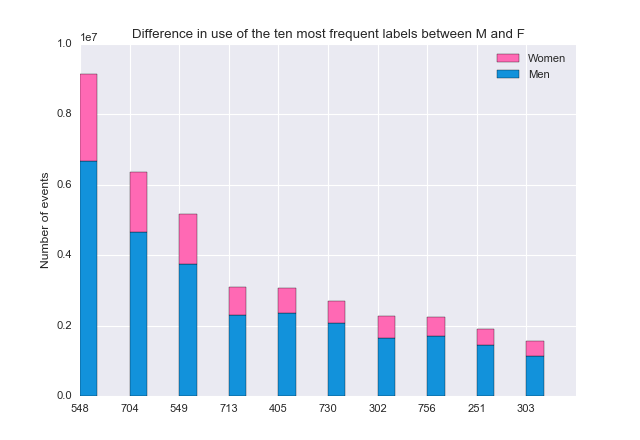

In [5]:

# Installed apps --------------------------------------------------------------

installed_events = labelled_app_events.query("is_installed == 1.0")
most_installed = installed_events['label_id'].value_counts().head(10)
print most_installed
least_installed = installed_events['label_id'].value_counts(ascending=True).head(10)
print least_installed

female_most_installed = []
male_most_installed = []
for app in most_installed.index:
    app_rows = installed_events[ installed_events['label_id'] == app]
    female_most_installed.append(len(app_rows.query('gender == "F"')))
    male_most_installed.append(len(app_rows.query('gender == "M"')))

f_users = list(female_most_installed/most_installed)
m_users = list(male_most_installed/most_installed)

f_users = [ '%.3f' % elem for elem in f_users]
m_users = [ '%.3f' % elem for elem in m_users]

print "For the first 5 most installed categories the percentage of users are: "
print "- females: {}\n- males: {}".format(f_users, m_users)

ind = np.arange(len(most_installed))  # the x locations for the groups
width = 0.35
plt.figure()
p1 = plt.bar(ind, male_most_installed, width, color="#1292db")
p2 = plt.bar(ind, female_most_installed, width, color="#ff69b4"
             , bottom=male_most_installed, tick_label=map(int, most_installed.index))

plt.ylabel('Number of events')
plt.title('Difference in use of the ten most frequent labels between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()


For the first 5 least installed categories the percentage of users are: 
- females: ['0.000', '0.000', '0.000', '1.000', '1.000', '0.000', '0.000', '0.000', '1.000', '0.000']
- males: ['1.000', '1.000', '1.000', '0.000', '0.000', '1.000', '1.000', '1.000', '0.000', '1.000']


<IPython.core.display.Javascript object>


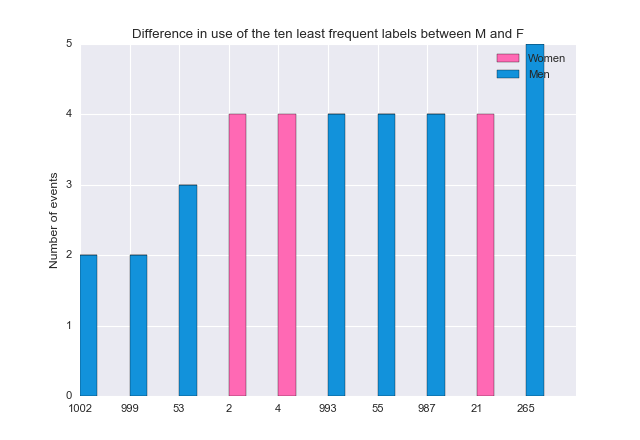

In [6]:
female_least_installed = []
male_least_installed = []
for app in least_installed.index:
    app_rows = installed_events[ installed_events['label_id'] == app]
    female_least_installed.append(len(app_rows.query('gender == "F"')))
    male_least_installed.append(len(app_rows.query('gender == "M"')))

f_users = list(female_least_installed/least_installed)
m_users = list(male_least_installed/least_installed)

f_users = [ '%.3f' % elem for elem in f_users]
m_users = [ '%.3f' % elem for elem in m_users]

print "For the first 5 least installed categories the percentage of users are: "
print "- females: {}\n- males: {}".format(f_users, m_users)

ind = np.arange(len(least_installed))  # the x locations for the groups
width = 0.35

plt.figure()
p1 = plt.bar(ind, male_least_installed, width, color="#1292db")
p2 = plt.bar(ind, female_least_installed, width, color="#ff69b4"
             , bottom=male_least_installed, tick_label=map(int, least_installed.index))

plt.ylabel('Number of events')
plt.title('Difference in use of the ten least frequent labels between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

548.0    3710511
704.0    2564077
549.0    2311992
713.0    1169417
405.0     872241
302.0     806364
730.0     793250
710.0     721643
756.0     678123
172.0     654672
Name: label_id, dtype: int64
997.0    1
977.0    1
998.0    2
82.0     2
87.0     2
970.0    3
973.0    3
984.0    3
81.0     4
988.0    5
Name: label_id, dtype: int64
For the first 5 most active apps the percentage of users are: 
- females: ['0.312', '0.314', '0.318', '0.299', '0.275', '0.328', '0.267', '0.325', '0.276', '0.331']
- males: ['0.688', '0.686', '0.682', '0.701', '0.725', '0.672', '0.733', '0.675', '0.724', '0.669']


<IPython.core.display.Javascript object>


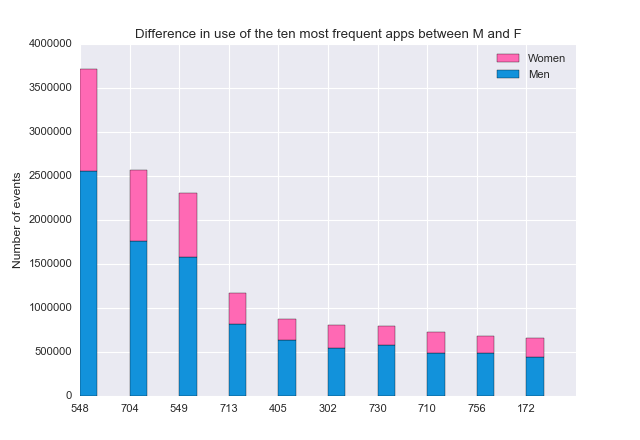

In [13]:
# Active apps ----------------------------------------------------------------
active_events = labelled_app_events.query("is_active == 1.0")
most_active = active_events['label_id'].value_counts().head(10)
print most_active
least_active = active_events['label_id'].value_counts(ascending=True).head(10)
print least_active

female_most_active = []
male_most_active = []
for app in most_active.index:
    app_rows = active_events[ active_events['label_id'] == app]
    female_most_active.append(len(app_rows.query('gender == "F"')))
    male_most_active.append(len(app_rows.query('gender == "M"')))

f_users = list(female_most_active/most_active)
m_users = list(male_most_active/most_active)

f_users = [ '%.3f' % elem for elem in f_users]
m_users = [ '%.3f' % elem for elem in m_users]

print "For the first 5 most active apps the percentage of users are: "
print "- females: {}\n- males: {}".format(f_users, m_users)

ind = np.arange(len(most_active))  # the x locations for the groups
width = 0.35
plt.figure()
p1 = plt.bar(ind, male_most_active, width, color="#1292db")
p2 = plt.bar(ind, female_most_active, width, color="#ff69b4"
             , bottom=male_most_active, tick_label=map(int, most_active.index))

plt.ylabel('Number of events')
plt.title('Difference in use of the ten most frequent apps between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()


For the first 5 least active categories the percentage of users are: 
- females: ['0.000', '0.000', '0.000', '0.000', '0.500', '0.333', '1.000', '0.667', '0.000', '1.000']
- males: ['1.000', '1.000', '1.000', '1.000', '0.500', '0.667', '0.000', '0.333', '1.000', '0.000']


<IPython.core.display.Javascript object>


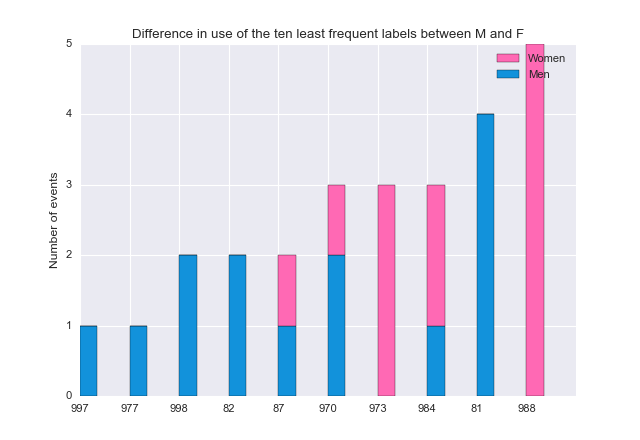

In [40]:
female_least_active = []
male_least_active = []
for app in least_active.index:
    app_rows = active_events[ active_events['label_id'] == app]
    female_least_active.append(len(app_rows.query('gender == "F"')))
    male_least_active.append(len(app_rows.query('gender == "M"')))

f_users = list(female_least_active/least_active)
m_users = list(male_least_active/least_active)

f_users = [ '%.3f' % elem for elem in f_users]
m_users = [ '%.3f' % elem for elem in m_users]

print "For the first 5 least active categories the percentage of users are: "
print "- females: {}\n- males: {}".format(f_users, m_users)

ind = np.arange(len(least_active))  # the x locations for the groups
width = 0.35

plt.figure()
p1 = plt.bar(ind, male_least_active, width, color="#1292db")
p2 = plt.bar(ind, female_least_active, width, color="#ff69b4", 
             bottom=male_least_active, tick_label=map(int, least_active.index))

plt.ylabel('Number of events')
plt.title('Difference in use of the ten least frequent labels between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()

In this case we see something interesting in least active and installed apps.
Here sthere are some categories that have a clear majority of users of one sex.
The number of events is very small in all of these cases but it can help
classify some cases.
The most frequents on the other hand bring more
information on how the users use the devices. However as the plots shows the
ratio female/male using the apps is practically constant between all the apps.
The frequency analysis confirms this observation and highlights how this ratio
is the same of the labels


For the first 10 most active apps the percentage of users are: 
- females: ['0.312', '0.314', '0.318', '0.299', '0.328', '0.275', '0.325', '0.331', '0.267', '0.327']
- males: ['0.688', '0.686', '0.682', '0.701', '0.672', '0.725', '0.675', '0.669', '0.733', '0.673']


<IPython.core.display.Javascript object>


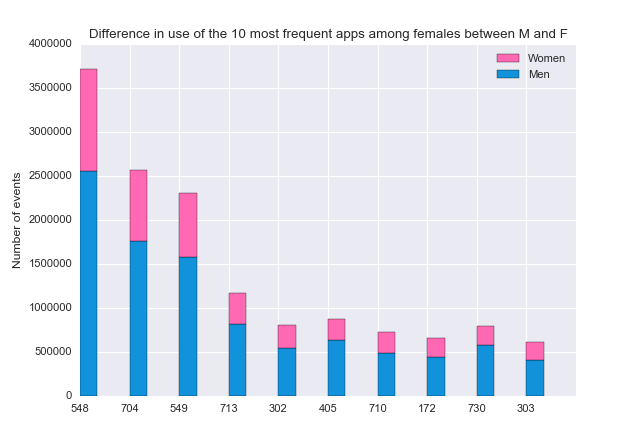

In [46]:
# --- FEMALE ACTIVITY ---------------------------------------------------------
active_fem = active_events.query("gender == 'F'")
most_active_F = active_fem['label_id'].value_counts().head(10)

female_most_active_F = []
male_most_active_F = []
for app in most_active_F.index:
    app_rows = active_events[ active_events['label_id'] == app]
    female_most_active_F.append(len(app_rows.query('gender == "F"')))
    male_most_active_F.append(len(app_rows.query('gender == "M"')))

tot = map(add, female_most_active_F, male_most_active_F)
total = pd.Series(tot, index=most_active_F.index)
f_users = list(female_most_active_F/total)
m_users = list(male_most_active_F/total)

f_users = [ '%.3f' % elem for elem in f_users]
m_users = [ '%.3f' % elem for elem in m_users]

print "For the first 10 most active apps the percentage of users are: "
print "- females: {}\n- males: {}".format(f_users, m_users)
plt.figure()
p1 = plt.bar(ind, male_most_active_F, width, color="#1292db")
p2 = plt.bar(ind, female_most_active_F, width, color="#ff69b4", 
             bottom=male_most_active_F, tick_label=map(int, most_active_F.index))

plt.ylabel('Number of events')
plt.title('Difference in use of the 10 most frequent apps among females between M and F')
plt.legend((p2[0], p1[0]), ('Women', 'Men'))
plt.show()


For the first 10 most active apps the percentage of users are: 
- females: ['0.312', '0.314', '0.318', '0.299', '0.275', '0.267', '0.328', '0.276', '0.325', '0.331']
- males: ['0.688', '0.686', '0.682', '0.701', '0.725', '0.733', '0.672', '0.724', '0.675', '0.669']


<IPython.core.display.Javascript object>


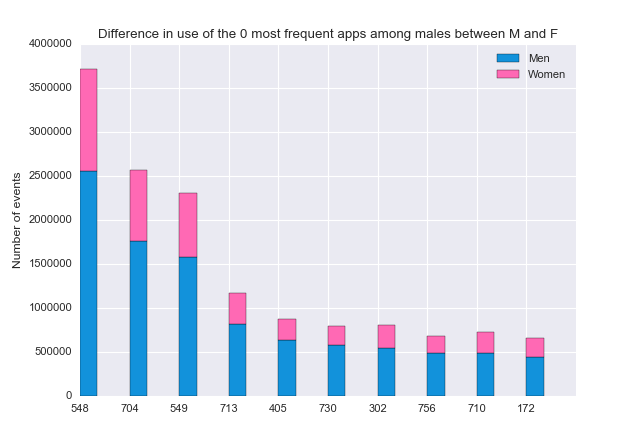

In [47]:
# --- MALE ACTIVITY -----------------------------------------------------------
active_mal = active_events.query("gender == 'M'")
most_active_M = active_mal['label_id'].value_counts().head(10)

female_most_active_M = []
male_most_active_M = []
for app in most_active_M.index:
    app_rows = active_events[ active_events['label_id'] == app]
    female_most_active_M.append(len(app_rows.query('gender == "F"')))
    male_most_active_M.append(len(app_rows.query('gender == "M"')))

tot = map(add, female_most_active_M, male_most_active_M)
total = pd.Series(tot, index=most_active_M.index)
f_users = list(female_most_active_M/total)
m_users = list(male_most_active_M/total)

f_users = [ '%.3f' % elem for elem in f_users]
m_users = [ '%.3f' % elem for elem in m_users]

print "For the first 10 most active apps the percentage of users are: "
print "- females: {}\n- males: {}".format(f_users, m_users)
plt.figure()
p1 = plt.bar(ind, male_most_active_M, width, color="#1292db")
p2 = plt.bar(ind, female_most_active_M, width, color="#ff69b4", 
             bottom=male_most_active_M, tick_label=map(int, most_active_M.index))

plt.ylabel('Number of events')
plt.title('Difference in use of the 0 most frequent apps among males between M and F')
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.show()


<IPython.core.display.Javascript object>


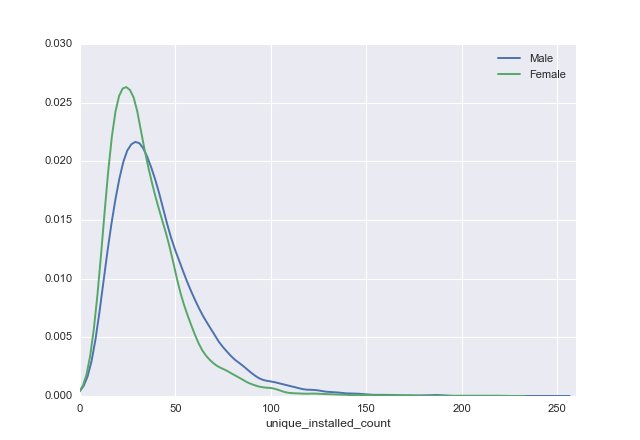

(0, 260)

In [12]:
# NUMBER OF APPS INSTALLED ----------------------------------------------------
gender = (installed_events[['device_id', 'gender']]
          .drop_duplicates(subset='device_id', keep='first')
          .set_index('device_id')
          )
tmp = installed_events[['app_id', 'device_id']]
tmp_2 = tmp.groupby('device_id', as_index=False)['app_id'].agg({'installed_list':(lambda x: list(x))})

tmp_2['unique_installed_count'] = tmp_2['installed_list'].apply(set).apply(len)
tmp_2 = tmp_2.set_index('device_id')
c_g = gender.join(tmp_2['unique_installed_count'], how='inner')

plt.figure()
sns.distplot(c_g.unique_installed_count[c_g['gender']=="M"], hist=False, label="Male")
sns.distplot(c_g.unique_installed_count[c_g['gender']=="F"], hist=False, label="Female").axes.set_xlim(0,260)

<IPython.core.display.Javascript object>


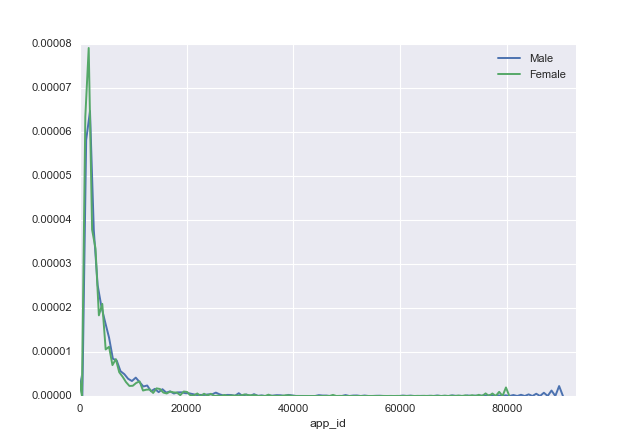

(0, 93000.0)

In [9]:
# NUMBER OF ACTIVE APPS ------------------------------------------------------
gender = (active_events[['device_id', 'gender']]
          .drop_duplicates(subset='device_id', keep='first')
          .set_index('device_id')
          )

tmp = active_events[['app_id', 'device_id']]
# even though the resulting column is called app_id it is the number of apps
# active per one user over the whole week
count = tmp.groupby('device_id').agg('count').sort_values(by='app_id', ascending=False)

c_g = gender.join(count['app_id'], how='inner')

plt.figure()

sns.distplot(c_g.app_id[c_g['gender']=="M"], hist=False, label="Male")
sns.distplot(c_g.app_id[c_g['gender']=="F"], hist=False, label="Female").axes.set_xlim(0,93000.0)



<IPython.core.display.Javascript object>


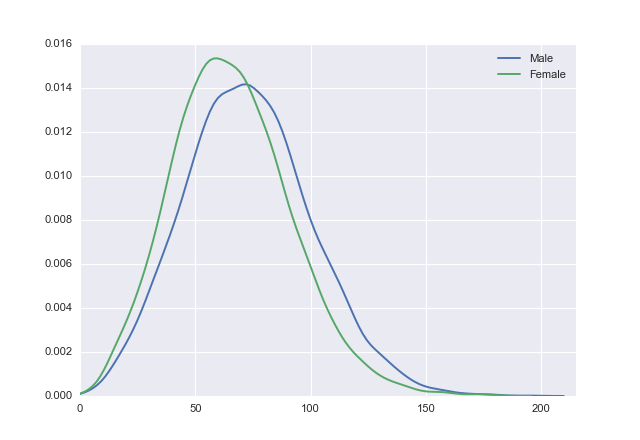

(0, 215)

In [10]:
# NUMBER OF LABELS INSTALLED ----------------------------------------------------
gender = (installed_events[['device_id', 'gender']]
          .drop_duplicates(subset='device_id', keep='first')
          .set_index('device_id')
          )
tmp = installed_events[['label_id', 'device_id']]
tmp_2 = tmp.groupby('device_id', as_index=False)['label_id'].agg({'installed_list':(lambda x: list(x))})

tmp_2['unique_installed_count'] = tmp_2['installed_list'].apply(set).apply(len)
tmp_2 = tmp_2.set_index('device_id')
c_g = gender.join(tmp_2['unique_installed_count'], how='inner')
plt.figure()
sns.kdeplot(c_g.unique_installed_count[c_g['gender']=="M"], label="Male")
sns.kdeplot(c_g.unique_installed_count[c_g['gender']=="F"], label="Female").axes.set_xlim(0,215)


<IPython.core.display.Javascript object>


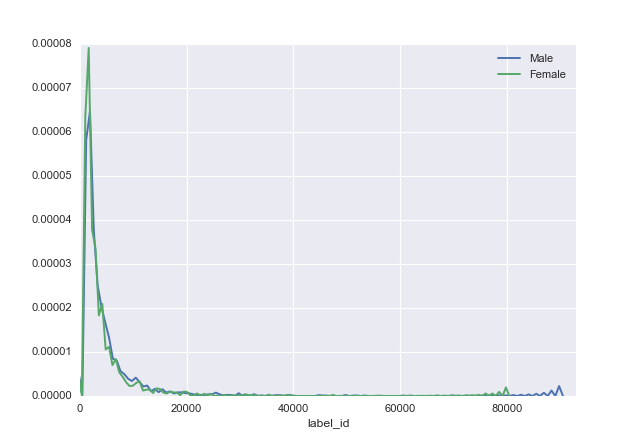

(0, 93000.0)

In [11]:
# NUMBER OF ACTIVE LABELS ------------------------------------------------------
gender = (active_events[['device_id', 'gender']]
          .drop_duplicates(subset='device_id', keep='first')
          .set_index('device_id')
          )

tmp = active_events[['label_id', 'device_id']]
# even though the resulting column is called label_id it is the number of apps
# active per one user over the whole week
count = tmp.groupby('device_id').agg('count').sort_values(by='label_id', ascending=False)

c_g = gender.join(count['label_id'], how='inner')

plt.figure()

sns.distplot(c_g.label_id[c_g['gender']=="M"], hist=False, label="Male")
sns.distplot(c_g.label_id[c_g['gender']=="F"], hist=False, label="Female").axes.set_xlim(0,93000.0)
